In [ ]:
'''

This is a notebook intended to automatically generate a Jupyter Notebook containing plots for detailed flag data 
in a given night's observations. In this notebook, plots are generated from both the flag files, and the flag_summary 
files, allowing us to compare them to ensure that flags are being generated correctly.

Coder: David Lewis 2018

'''


In [255]:
#Init

import glob
from hera_qm import xrfi as xrfi
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
import numpy as np
import numpy.ma as ma
import os
from pyuvdata import UVData
import sys
from hera_qm import xrfi as xrfi

#Librarian init, to be added
# import hera_librarian
#
#
#
np.set_printoptions(threshold='nan')
Data_Path='/data6/HERA/data/2458042'
uv=UVData()
ant1=1
ant2=11

In [256]:
#First, get flag summaries and plot them:

#Summary variable init
first=True
file_flag_summary_xx=[]
file_flag_summary_yy=[]
file_flags=[]
sum_chan_mean_xx=[]
sum_chan_mean_yy=[]
sum_flag_times_xx=[]
sum_flag_times_yy=[]
sum_time_mean_xx=[]
sum_time_mean_yy=[]
sum_flag_waterfall_xx=[]
sum_flag_waterfall_yy=[]

#Gather flag summaries
#start with xx
file_flag_summary_xx=glob.glob(Data_Path + '/*.xx.*.flag_summary.npz')
file_flag_summary_xx.sort()
#Continue with yy
file_flag_summary_yy=glob.glob(Data_Path + '/*.yy.*.flag_summary.npz')
file_flag_summary_yy.sort()

#load in all those flags
for i, sumfile in enumerate(file_flag_summary_xx):
    flag_sum_data=np.load(sumfile)
    sum_chan_mean_xx.extend(flag_sum_data['fmean'].squeeze())
    sum_flag_times_xx.extend(flag_sum_data['times'])
    sum_time_mean_xx.append(flag_sum_data['tmean'].squeeze())
    sum_waterfallarr=flag_sum_data['waterfall'].squeeze(axis=2)
    sum_flag_waterfall_xx.extend(sum_waterfallarr)
for i, sumfile in enumerate(file_flag_summary_yy):
    flag_sum_data=np.load(sumfile)
    sum_chan_mean_yy.extend(flag_sum_data['fmean'].squeeze())
    sum_flag_times_yy.extend(flag_sum_data['times'])
    sum_time_mean_yy.append(flag_sum_data['tmean'].squeeze())
    sum_waterfallarr=flag_sum_data['waterfall'].squeeze(axis=2)
    sum_flag_waterfall_yy.extend(sum_waterfallarr)



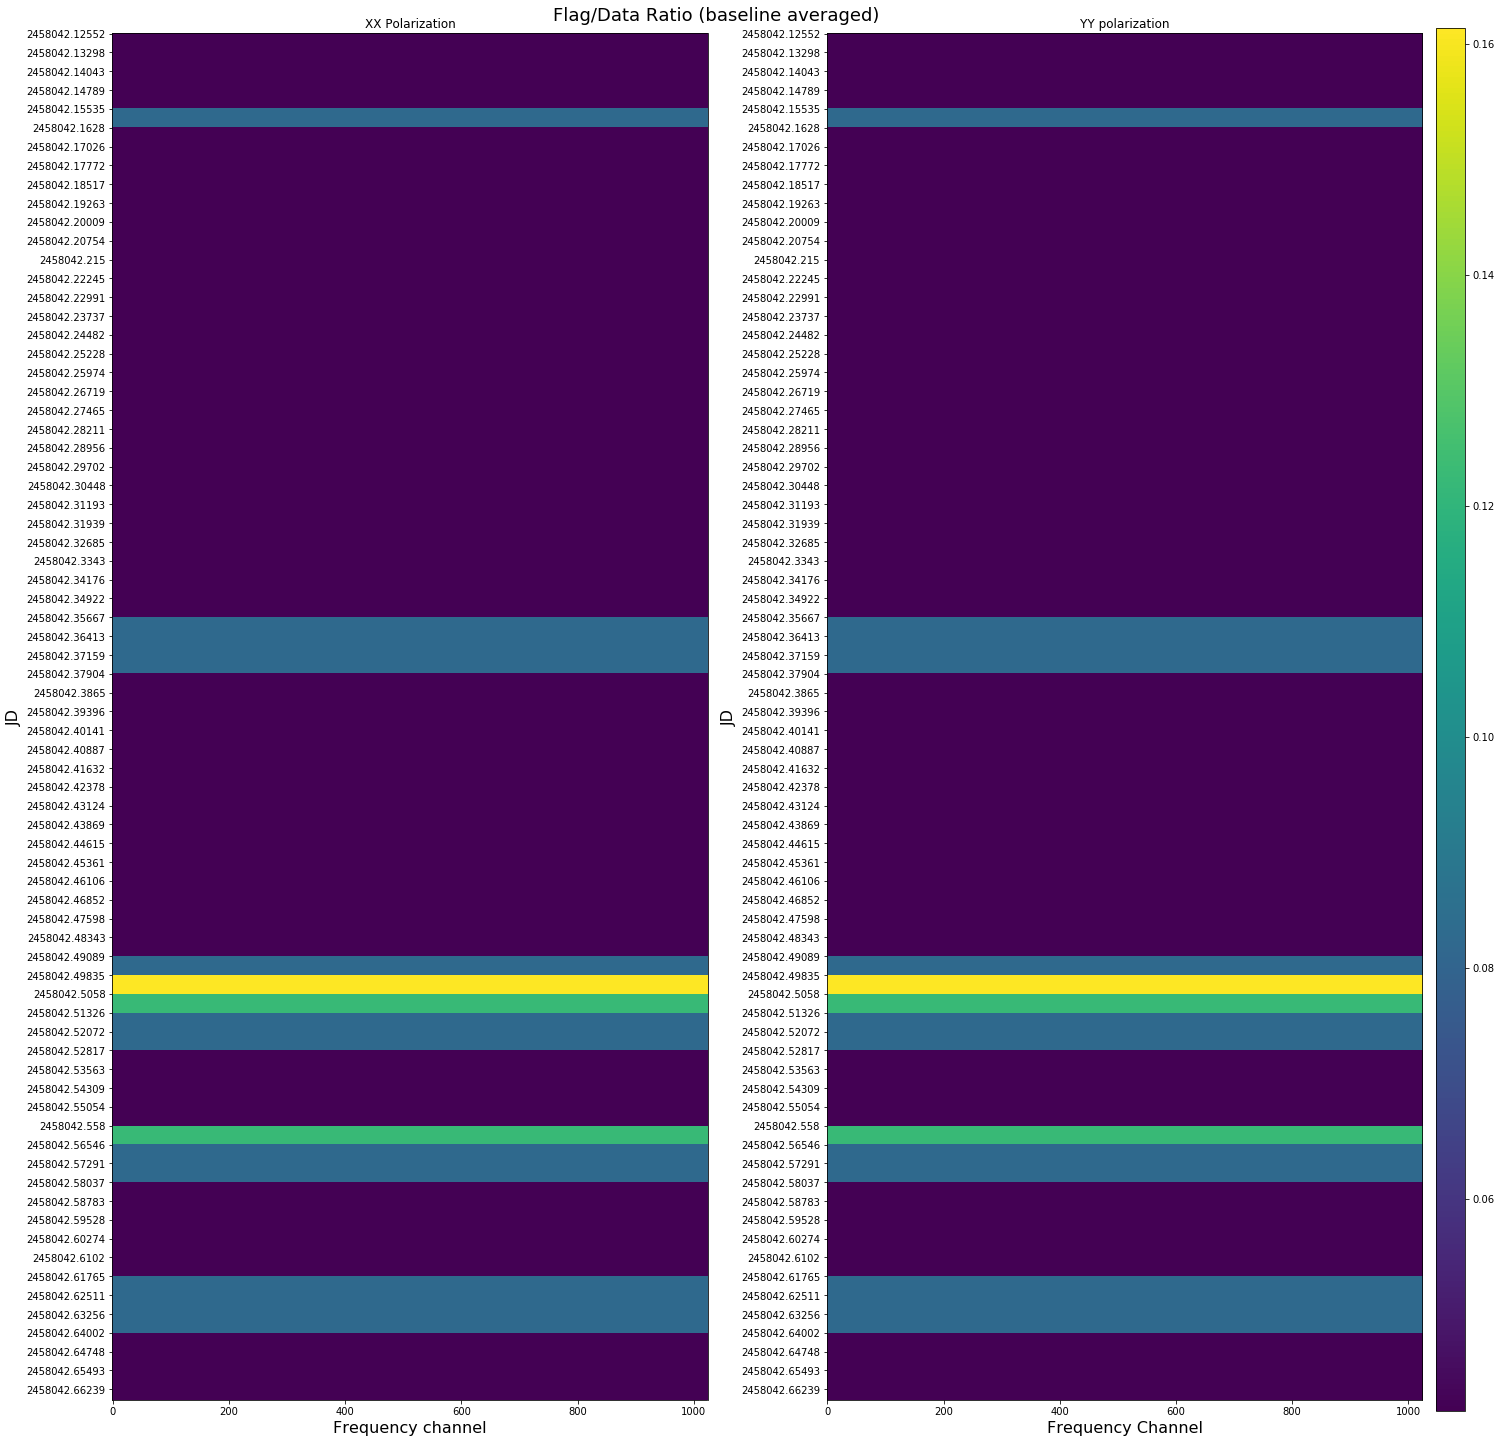

In [257]:
#Plot flag summary waterfalls
fig, axarr = plt.subplots(1,2, figsize=(20, 20))
plt.setp(axarr,yticks=np.arange(0,4353,60),yticklabels=sum_flag_times_xx[::60])
plt.suptitle('Flag/Data Ratio (baseline averaged)', y=1, fontsize=18)
#xx waterfall
axarr[0].set_title('XX Polarization')
axarr[0].set_ylabel('JD', fontsize=16)
axarr[0].set_xlabel('Frequency channel', fontsize=16)
axarr[0].imshow(sum_flag_waterfall_xx,aspect='auto')
#yy waterfall
axarr[1].set_title('YY polarization')
axarr[1].set_ylabel('JD', fontsize=16)
axarr[1].set_xlabel('Frequency Channel', fontsize=16)
im=axarr[1].imshow(sum_flag_waterfall_yy,aspect='auto')
#colorbar
cb_ax = fig.add_axes([1, .025, 0.02, .96])
cbar = fig.colorbar(im, cax=cb_ax)

plt.tight_layout()
plt.show()

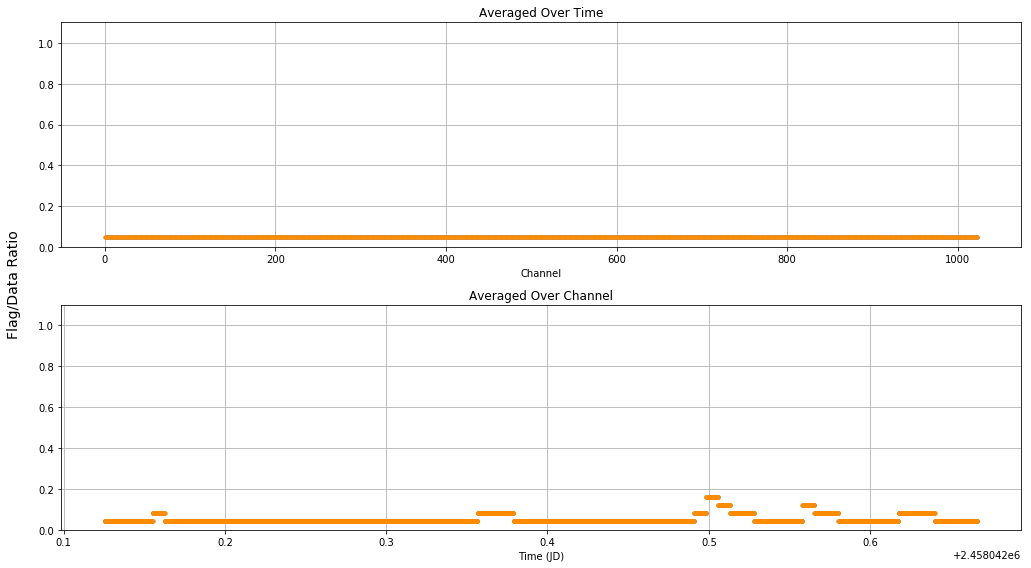

In [258]:
flagSumFreqAvg_xx=sum_chan_mean_xx
flagSumTimeAvg_xx=np.average(sum_time_mean_xx,axis=0)
flagSumFreqAvg_yy=sum_chan_mean_yy
flagSumTimeAvg_yy=np.average(sum_time_mean_yy,axis=0)

#Get ready to plot
fig, ax = plt.subplots(2, figsize=(14, 8))


#Generate time averaged plots:
ax[0].grid()
ax[0].set_title('Averaged Over Time')
ax[0].set_xlabel('Channel')
ax[0].set_ylim(0,1.1)
ax[0].plot(flagSumTimeAvg_xx, color='steelblue', marker='.', ls='')
ax[0].plot(flagSumTimeAvg_yy, color='darkorange', marker='.', ls='')
#Frequency averaged plots
ax[1].grid()
ax[1].set_title('Averaged Over Channel')
ax[1].set_xlabel('Time (JD)')
ax[1].set_ylim(0,1.1)
ax[1].plot(sum_flag_times_xx,flagSumFreqAvg_xx, color='steelblue', marker='.', ls='')
ax[1].plot(sum_flag_times_yy,flagSumFreqAvg_yy, color='darkorange', marker='.', ls='')

#plt.xticks(np.arange(0,4353,60),file_times[::60])

fig.text(-.02, 0.5, 'Flag/Data Ratio', va='center', rotation='vertical', size='14')

plt.tight_layout()
plt.show()


In [235]:
testflagfile='/data6/HERA/data/2458042/zen.2458042.12552.xx.HH.uvO.flags.npz'
testflagsumfile='/data6/HERA/data/2458042/zen.2458042.12552.xx.HH.uvO.flag_summary.npz'

flag_stuff=np.load(testflagfile)
flag_sum_stuff=np.load(testflagsumfile)
print flag_stuff.files
print flag_sum_stuff.files

['waterfall', 'flag_array', 'history']
['version', 'tmean', 'tmin', 'fstd', 'pols', 'fmax', 'tmax', 'tstd', 'freqs', 'times', 'fmean', 'waterfall', 'fmin', 'tmedian', 'fmedian']


In [245]:
print flag_sum_stuff['version']

hera_qm version: 1.0.  Git origin: https://github.com/HERA-Team/hera_qm.git.  Git hash: 53063f15406b8a12bf82e60e8628823ef81a01f2.  Git branch: h1c.  Git description: v1.0-1-g53063f1.


In [236]:
timelen=len(flag_stuff['waterfall'])
testtimeavg=np.mean(flag_stuff['flag_array'], axis=(0,1,3))
print testtimeavg.shape
testchanavgtmp=np.mean(flag_stuff['flag_array'], axis=(1,2,3))
print testchanavgtmp.shape
numbaseline=len(testchanavgtmp)/timelen
print numbaseline
tempchan=np.reshape(testchanavgtmp,(timelen, numbaseline))
print tempchan.shape
testchanavg=np.mean(tempchan, axis=1)
print testchanavg.shape

(1024,)
(67680,)
1128
(60, 1128)
(60,)


In [237]:
print flag_stuff['flag_array'].shape
reshapetest=np.reshape(flag_stuff['flag_array'], (timelen,numbaseline, 1,1024,1))
print reshapetest.shape
waterfalltest=np.average(reshapetest, axis=1).squeeze()

(67680, 1, 1024, 1)
(60, 1128, 1, 1024, 1)


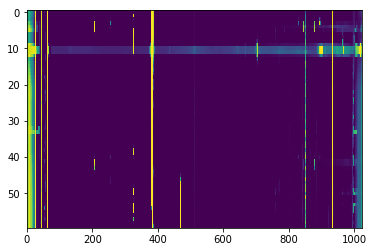

In [238]:
plt.figure()
plt.imshow(waterfalltest, aspect='auto')
plt.show()

In [239]:
print flag_sum_stuff['fmean'].shape
print flag_sum_stuff['fmean'].squeeze().shape
print flag_sum_stuff['tmean'].shape
print flag_sum_stuff['tmean'].squeeze().shape
print flag_sum_stuff['waterfall'].shape
print flag_sum_stuff['waterfall'].squeeze().shape

(60, 1)
(60,)
(1024, 1)
(1024,)
(60, 1024, 1)
(60, 1024)


In [240]:
print flag_sum_stuff['fmean'].squeeze()

[ 0.04166667  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667
  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667
  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667
  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667
  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667
  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667
  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667
  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667
  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667
  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667]


In [241]:
testsumchanavg=flag_sum_stuff['fmean'].squeeze()
testsumtimeavg=flag_sum_stuff['tmean'].squeeze()

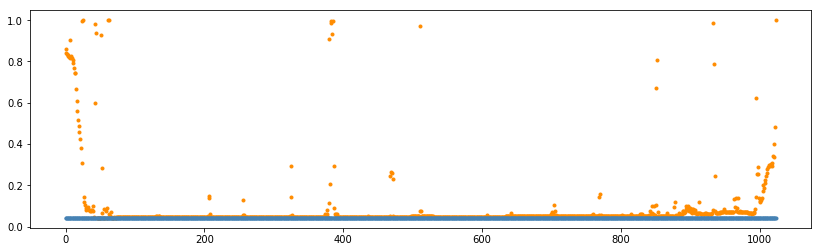

In [242]:
plt.figure(figsize=(14,4))
plt.plot(testtimeavg, color='darkorange', marker='.', ls='')
plt.plot(testsumtimeavg, color='steelblue', marker='.', ls='')
plt.show()

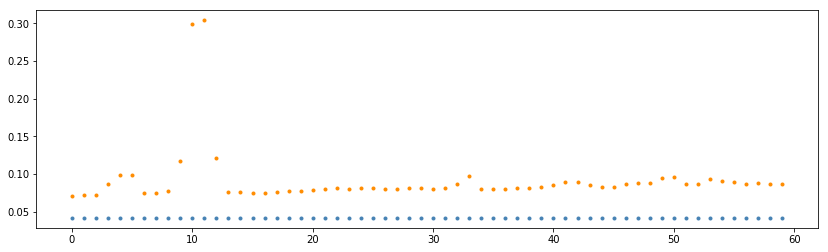

In [243]:
plt.figure(figsize=(14,4))
plt.plot(testchanavg, color='darkorange', marker='.', ls='')
plt.plot(testsumchanavg, color='steelblue', marker='.', ls='')
plt.show()

In [260]:
file_flag_xx=[]
file_flag_yy=[]
time_mean_xx=[]
time_mean_yy=[]
flag_times_xx=[]
flag_times_yy=[]
chan_mean_xx=[]
chan_mean_yy=[]
flag_waterfall_xx=[]
flag_waterfall_yy=[]

#get flag files, extract info
file_flag_xx=glob.glob(Data_Path+'/*.xx.*.flags.npz')
file_flag_xx.sort()
file_flag_yy=glob.glob(Data_Path+'/*.yy.*.flags.npz')
file_flag_yy.sort()

for i,flagfile in enumerate(file_flag_xx):
    print ('Loading ' + flagfile)
    flag_data=np.load(flagfile)
    timelen=len(flag_data['waterfall'])
    time_mean_xx.append(np.mean(flag_data['flag_array'],axis=(0,1,3)))
    chan_mean_temp=np.mean(flag_data['flag_array'], axis=(1,2,3))
    numbaseline=len(chan_mean_temp)/timelen
    chantemp=np.reshape(chan_mean_temp,(timelen, numbaseline))
    chan_mean_xx.extend(np.mean(chantemp, axis=1))
    waterfalltempxx=np.reshape(flag_data['flag_array'], (timelen, numbaseline, 1,1024,1))
    flag_waterfall_xx.extend(np.average(waterfalltempxx, axis=1).squeeze())
    
for i,flagfile in enumerate(file_flag_yy):
    print ('Loading ' + flagfile)
    flag_data=np.load(flagfile)
    timelen=len(flag_data['waterfall'])
    time_mean_yy.append(np.mean(flag_data['flag_array'],axis=(0,1,3)))
    chan_mean_temp=np.mean(flag_data['flag_array'], axis=(1,2,3))
    numbaseline=len(chan_mean_temp)/timelen
    chantemp=np.reshape(chan_mean_temp,(timelen, numbaseline))
    chan_mean_yy.extend(np.mean(chantemp, axis=1))
    waterfalltempyy=np.reshape(flag_data['flag_array'], (timelen, numbaseline, 1,1024,1))
    flag_waterfall_yy.extend(np.average(waterfalltempyy, axis=1).squeeze())
    
time_mean_xx=np.mean(time_mean_xx, axis=0)
time_mean_yy=np.mean(time_mean_yy, axis=0)

Loading /data6/HERA/data/2458042/zen.2458042.12552.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.13298.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.14043.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.14789.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.15535.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.16280.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.17026.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.17772.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.18517.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.19263.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.20009.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.20754.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.21500.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.22245.xx.HH.uvO.flags.npz
Loadin

Loading /data6/HERA/data/2458042/zen.2458042.44615.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.45361.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.46106.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.46852.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.47598.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.48343.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.49089.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.49835.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.50580.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.51326.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.52072.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.52817.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.53563.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.54309.yy.HH.uvO.flags.npz
Loadin

4380


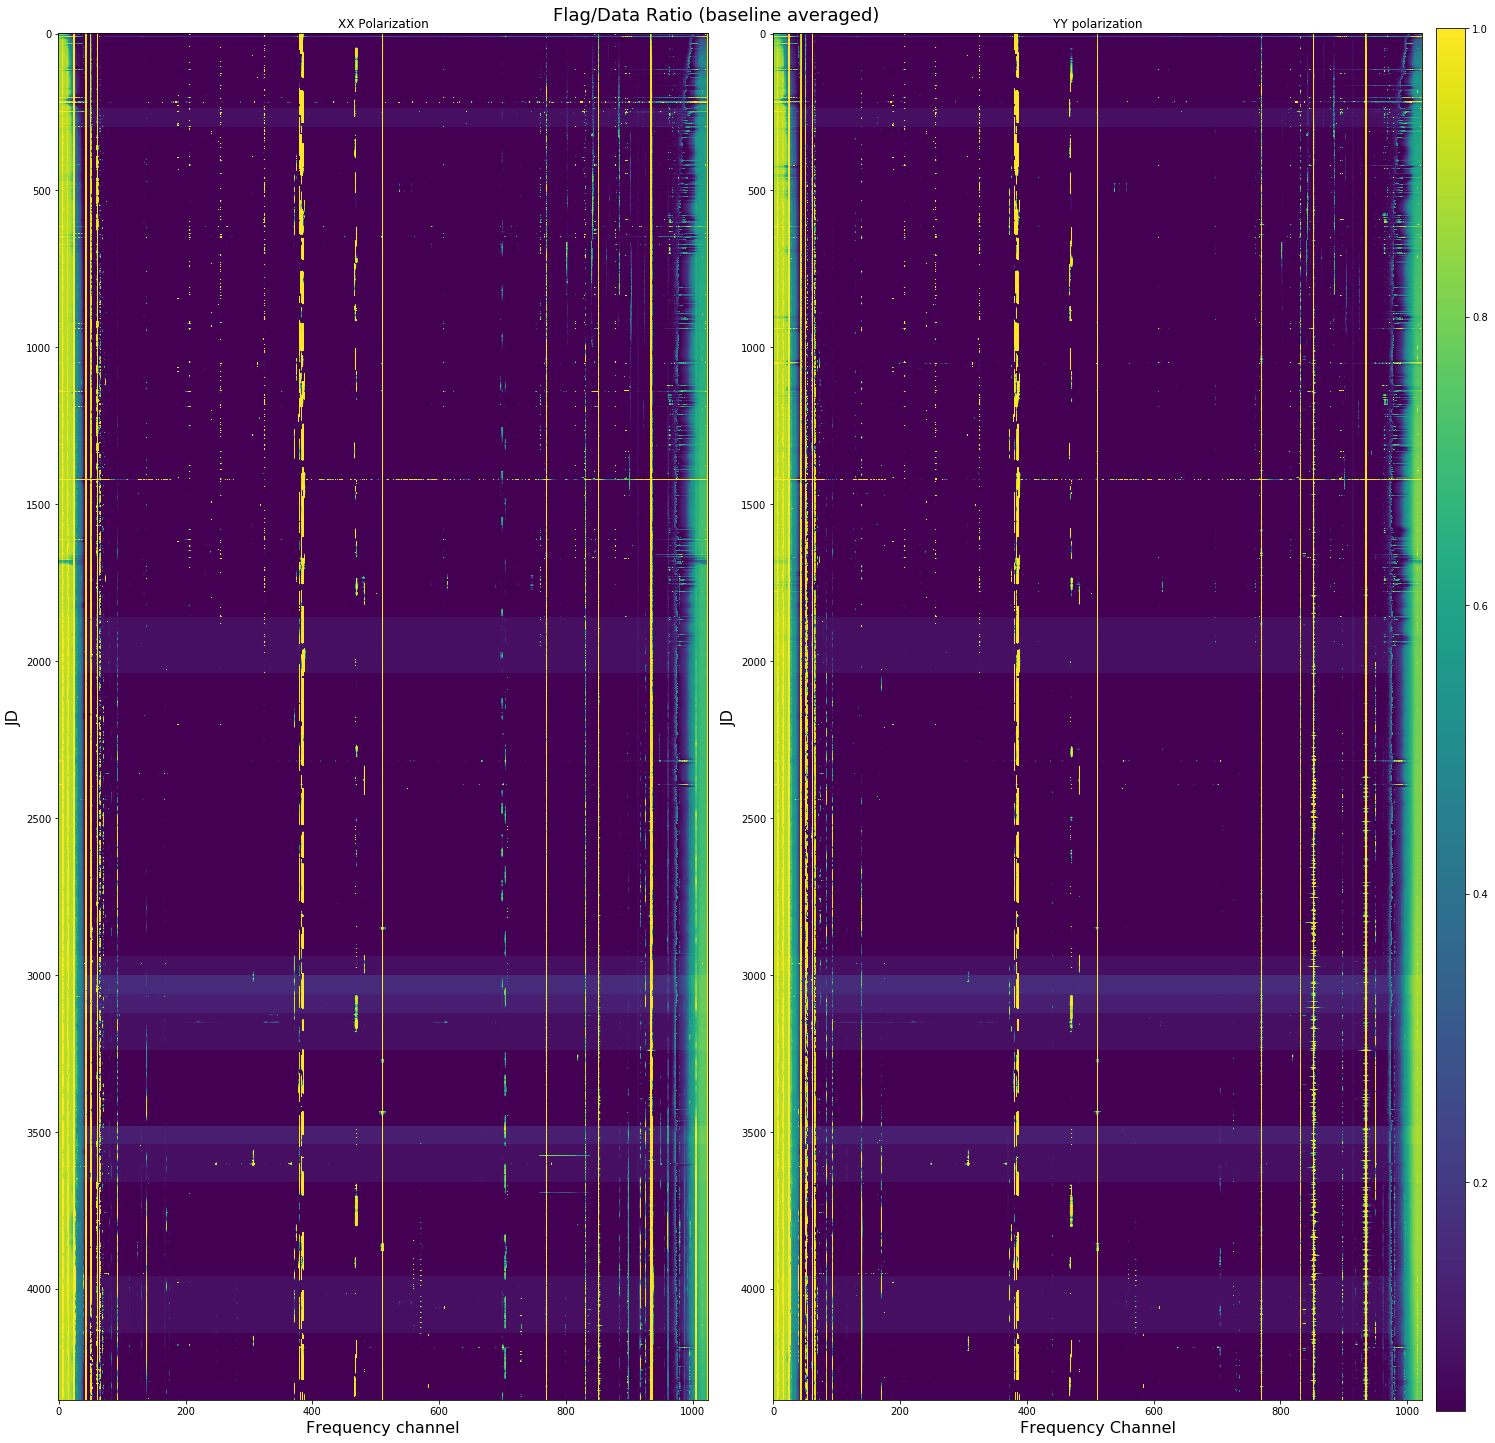

In [234]:
#Plot flag waterfalls
fig, axarr2 = plt.subplots(1,2, figsize=(20, 20))
#plt.setp(axarr,yticks=np.arange(0,4353,60),yticklabels=sum_flag_times_xx[::60])
plt.suptitle('Flag/Data Ratio (baseline averaged)', y=1, fontsize=18)
#xx waterfall
axarr2[0].set_title('XX Polarization')
axarr2[0].set_ylabel('JD', fontsize=16)
axarr2[0].set_xlabel('Frequency channel', fontsize=16)
axarr2[0].imshow(flag_waterfall_xx,aspect='auto')
#yy waterfall
axarr2[1].set_title('YY polarization')
axarr2[1].set_ylabel('JD', fontsize=16)
axarr2[1].set_xlabel('Frequency Channel', fontsize=16)
im=axarr2[1].imshow(flag_waterfall_yy,aspect='auto')
#colorbar
cb_ax = fig.add_axes([1, .025, 0.02, .96])
cbar = fig.colorbar(im, cax=cb_ax)

plt.tight_layout()
plt.show()

In [221]:

print (str(len(time_mean_xx)))
print (str(len(chan_mean_xx)))

1024
4354


In [ ]:
#make waterfalls
#copy into separate elements for each time interval
for i in timelen
    flag_waterfall_xx[i].append(flag_data['flag_array'])


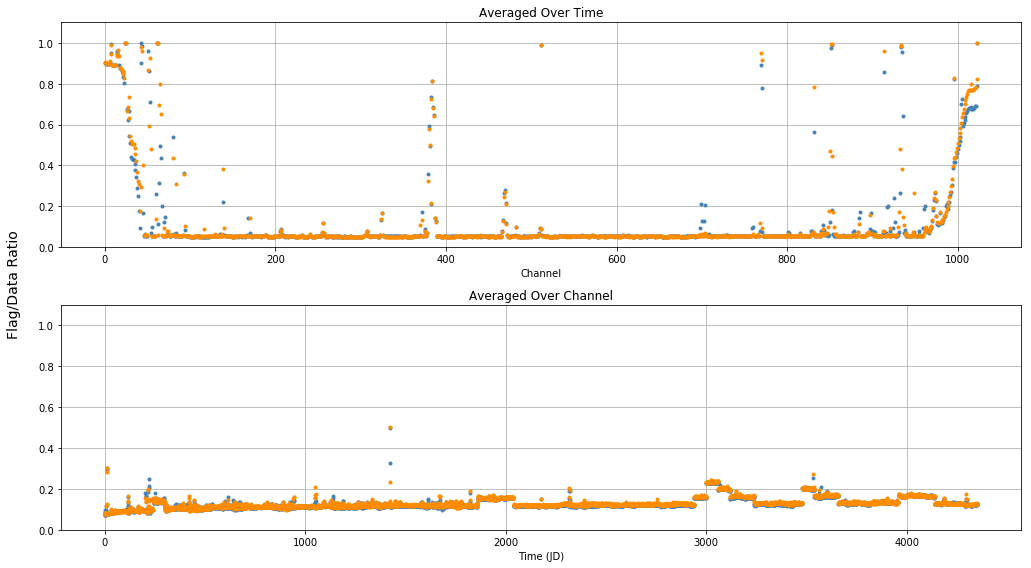

In [109]:


#Get ready to plot
fig, ax2 = plt.subplots(2, figsize=(14, 8))


#Generate time averaged plots:
ax2[0].grid()
ax2[0].set_title('Averaged Over Time')
ax2[0].set_xlabel('Channel')
ax2[0].set_ylim(0,1.1)
ax2[0].plot(time_mean_xx, color='steelblue', marker='.', ls='')
ax2[0].plot(time_mean_yy, color='darkorange', marker='.', ls='')
#Frequency averaged plots
ax2[1].grid()
ax2[1].set_title('Averaged Over Channel')
ax2[1].set_xlabel('Time (JD)')
ax2[1].set_ylim(0,1.1)
ax2[1].plot(chan_mean_xx, color='steelblue', marker='.', ls='')
ax2[1].plot(chan_mean_yy, color='darkorange', marker='.', ls='')
#plt.xticks(np.arange(0,4353,60),file_times[::60])

fig.text(-.02, 0.5, 'Flag/Data Ratio', va='center', rotation='vertical', size='14')

plt.tight_layout()
plt.show()

In [148]:
#This cell is intended as proof that the files are correct or incorrect, since the flag and flag_summary files may both be wrong.

Data_Path_Man='/data6/HERA/data/2458042'

file_flag_man_xx=[]
file_flag_man_yy=[]
file_flags_man=[]
flag_mean_man_xx=[]
flag_mean_man_yy=[]
flag_times_man_xx=[]
flag_times_man_yy=[]
time_mean_man_xx=[]
time_mean_man_yy=[]
flag_waterfall_man_xx=[]
flag_waterfall_man_yy=[]
#Gather files:
#files_to_run=glob(Data_Path +'zen.*.xx.*.uv*R*')

#gather flag summary
##start with XX
file_flag_man_xx=glob.glob(Data_Path_Man + '/zen.*.xx.HH.uv')
file_flag_man_xx.sort()
#can be expanded to yy and others
file_flag_man_yy=glob.glob(Data_Path_Man + '/zen.*.yy.HH.uv')
file_flag_man_yy.sort()

#load in all those flags
for i, manfile in enumerate(file_flag_man_xx):
    print ('Reading' + manfile)
    uv.read_miriad(manfile)
    flag_waterfall_man_xx.extend(xrfi.flags2waterfall(uv))
    flag_times_man_xx.extend(uv.get_times(ant1,ant2))
'''
for i, manfile in enumerate(file_flag_man_yy):
    print ('Reading' + manfile)
    uv.read_miriad(manfile)
    flag_waterfall_man_yy.append(xrfi.flags2waterfall(uv))
    flag_times_man_yy.extend(uv.get_times(ant1,ant2))
'''     

Reading/data6/HERA/data/2458042/zen.2458042.12552.xx.HH.uv
Reading/data6/HERA/data/2458042/zen.2458042.13298.xx.HH.uv
Reading/data6/HERA/data/2458042/zen.2458042.14043.xx.HH.uv
Reading/data6/HERA/data/2458042/zen.2458042.14789.xx.HH.uv
Reading/data6/HERA/data/2458042/zen.2458042.15535.xx.HH.uv
Reading/data6/HERA/data/2458042/zen.2458042.16280.xx.HH.uv
Reading/data6/HERA/data/2458042/zen.2458042.17026.xx.HH.uv
Reading/data6/HERA/data/2458042/zen.2458042.17772.xx.HH.uv
Reading/data6/HERA/data/2458042/zen.2458042.18517.xx.HH.uv
Reading/data6/HERA/data/2458042/zen.2458042.19263.xx.HH.uv
Reading/data6/HERA/data/2458042/zen.2458042.20009.xx.HH.uv
Reading/data6/HERA/data/2458042/zen.2458042.20754.xx.HH.uv
Reading/data6/HERA/data/2458042/zen.2458042.21500.xx.HH.uv
Reading/data6/HERA/data/2458042/zen.2458042.22245.xx.HH.uv
Reading/data6/HERA/data/2458042/zen.2458042.22991.xx.HH.uv
Reading/data6/HERA/data/2458042/zen.2458042.23737.xx.HH.uv
Reading/data6/HERA/data/2458042/zen.2458042.24482.xx.HH.

"\nfor i, manfile in enumerate(file_flag_man_yy):\n    print ('Reading' + manfile)\n    uv.read_miriad(manfile)\n    flag_waterfall_man_yy.append(xrfi.flags2waterfall(uv))\n    flag_times_man_yy.extend(uv.get_times(ant1,ant2))\n"

In [147]:
print flag_waterfall_man_xx[0][:]

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0. 

In [150]:
flag_mean_man_xx=np.average(flag_waterfall_man_xx, axis=0)
time_mean_man_xx=np.average(flag_waterfall_man_xx, axis=1)   
#flag_mean_man_yy=np.average(flag_waterfall_man_yy, axis=0)
#time_mean_man_yy=np.average(flag_waterfall_man_yy, axis=1) 

In [161]:
print flag_waterfall_man_xx[0][0]

0.0


In [193]:
file_flag_test_xx=Data_Path_Man + 'zen.2458042.12552.xx.HH.uvOR'
uv.read_miriad(file_flag_test_xx)
waterfalltest=xrfi.flags2waterfall(uv)

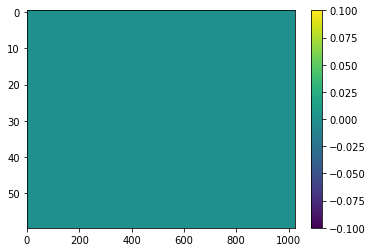

In [189]:
plt.figure()
plt.imshow(waterfalltest, aspect='auto')
plt.colorbar()
plt.show()

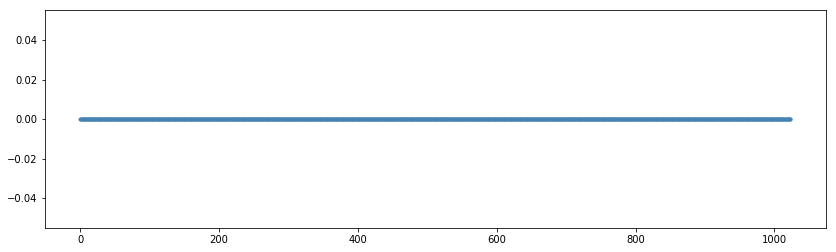

In [190]:
plt.figure(figsize=(14,4))
plt.plot(np.average(waterfalltest, axis=0),color='steelblue', marker='.', ls='')
plt.show()

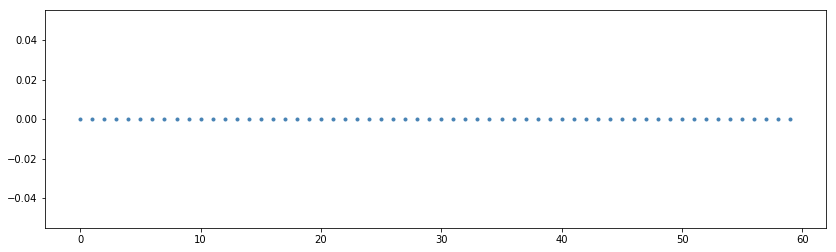

In [191]:
plt.figure(figsize=(14,4))
plt.plot(np.average(waterfalltest, axis=1),color='steelblue', marker='.', ls='')
plt.show()

In [254]:
Data_Path_test='/data6/HERA/data/2458042'

print os.path.split(Data_Path_test)

('/data6/HERA/data', '2458042')
